In [46]:
%config IPCompleter.greedy=True

In [47]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

In [48]:
import mlxtend
mlxtend.__version__

'0.21.0'

## 데이터 불러들이기 및 확인

In [49]:
train_df = pd.read_csv('./reg_data/train.csv')
test_df = pd.read_csv('./reg_data/test.csv')

In [50]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
    """
    MSSubClass : 매매와 관련된 주거 타입 식별
    MSZoning : 매매의 일반적인 지역 분류
    LotFrontage : 부동산과 연결된 도로의 선형 피트
    LotArea : 평방피트 단위의 부지 크기
    Street : 부동산으로의 도로(street) 접근 유형
    Alley : 부동산으로의 골목(alley) 접근 유형
    LotShape : 부동산의 일반적인 모양
    LandContour : 부동산의 평탄도
    Utilities : 사용 가능한 유틸리티(수도전기가스) 유형
    LotConfig : 지역 구성
    LandSlope : 부동산의 경사
    Neighborhood : 에임스 시 경계 내의 물리적인 위치
    Condition1 : 주요 도로 및 철도와의 근접성
    Condition2 : 주요 도로 및 철도와의 근접성 (두 개 이상 존재하는 경우)
    BldgType : 주거 유형
    HouseStyle : 주거 스타일
    OverallQual : 전체적인 재료 및 마감 등급
    OverallCond : 집의 전체적인 상태 등급
    YearBuilt : 원래 공사일
    YearRemodAdd : 리모델링 날짜 (리모델링 혹은 추가가 없었던 경우 공사일과 동일)
    RoofStyle : 지붕 유형
    RoofMatl : 지붕 재료
    Exterior 1st : 주택 외장재
    Exterior 2nd : 주택 외장재 (두 개 이상 존재하는 경우)
    MasVnrType : 벽돌 베니어 유형
    MasVnrArea : 벽돌 베니어 면적 (평방피트)
    ExterQual : 외장재 품질
    ExterCond : 외장재 현재 상태
    Foundation : 토대 유형
    BsmtQual : 지하의 높이 평가
    BsmtCond : 지하실 일반적인 상태 평가
    BsmtExposure : 워크아웃 혹은 정원 수준의 벽
    BsmtFinType1 : 지하 마감면의 품질
    BsmtSF1 : 유형 1 마감 평방피트
    BsmtFinType2 : 지하 마감면의 품질 (있는 경우)
    BsmtSF2 : 유형 2 마감 평방피트
    BsmtUnfSF : 마감되지 않은 지하실 면적
    TotalBsmtSF : 지하 총 평방피트
    Heating : 난방 유형
    HeatingQC : 난방 품질 및 상태
    CentralAir : 중앙 에어컨 여부
    Electrial : 전기 시스템
    1stFlrSF : 1층 평방피트
    2ndFlrSF : 2층 평방피트
    LowQualFinSF : 저품질 마감 평방 피트 (모든 층)
    GrLivArea : 지상 거실 면적 평방 피트
    BsmtFullBath : 지하 전체 욕실
    BsmtHalfBath : 지하 반 욕실
    FullBath : 지하층 위의 전체 욕실
    HalfBath : 지하층 위의 반 욕실
    Bedroom : 지하층 위의 침실 수 (지하 침실은 포함하지 않음)
    Kitchen : 지하층 위의 주방 수
    KitchenQual : 주방 품질
    TotRmsAbvGra : 지하층 위의 모든 방 (욕실 제외)
    Functional : 집 기능 (공제가 보장되지 않는 한 일반적인 경우 가정)
    FirePlace : 벽난로 수
    FireplaceQu : 벽난로 품질
    GarageType : 차고 위치
    GarageYrBlt : 차고 건설 연도
    GarageFinish : 차고 내부 마감
    GarageCars : 차량 수용 가능 차고 크기
    GarageArea : 차고 평방피트
    GarageQual : 차고 품질
    GarageCond : 차고 상태
    PavedDrive : 포장된 진입로
    WoodDeckSF : 평방피트 단위의 목재 데크 면적
    OpenPochSF : 평방피트 단위의 개방 현관 면적
    EnclosedPorch : 평방피트 단위의 닫힌 현관 면적
    3SnPorch : 평방 피트의 세 계절 현관 면적
    ScreenPorch : 평방피트 단위의 스크린 현관 면적
    PoolArea : 평방피트 단위의 수영장 면적
    PoolQC : 수영장 품질
    Fence : 울타리 품질
    MiscFeature : 다른 항목에서 다루지 않는 기타 특징
    MiscVal : 기타 특징의 가치
    MoSold : 월 판매
    YrSold : 연 판매
    SaleType : 판매 유형
    SaleCondition : 판매 상태
    """

'\nMSSubClass : 매매와 관련된 주거 타입 식별\nMSZoning : 매매의 일반적인 지역 분류\nLotFrontage : 부동산과 연결된 도로의 선형 피트\nLotArea : 평방피트 단위의 부지 크기\nStreet : 부동산으로의 도로(street) 접근 유형\nAlley : 부동산으로의 골목(alley) 접근 유형\nLotShape : 부동산의 일반적인 모양\nLandContour : 부동산의 평탄도\nUtilities : 사용 가능한 유틸리티(수도전기가스) 유형\nLotConfig : 지역 구성\nLandSlope : 부동산의 경사\nNeighborhood : 에임스 시 경계 내의 물리적인 위치\nCondition1 : 주요 도로 및 철도와의 근접성\nCondition2 : 주요 도로 및 철도와의 근접성 (두 개 이상 존재하는 경우)\nBldgType : 주거 유형\nHouseStyle : 주거 스타일\nOverallQual : 전체적인 재료 및 마감 등급\nOverallCond : 집의 전체적인 상태 등급\nYearBuilt : 원래 공사일\nYearRemodAdd : 리모델링 날짜 (리모델링 혹은 추가가 없었던 경우 공사일과 동일)\nRoofStyle : 지붕 유형\nRoofMatl : 지붕 재료\nExterior 1st : 주택 외장재\nExterior 2nd : 주택 외장재 (두 개 이상 존재하는 경우)\nMasVnrType : 벽돌 베니어 유형\nMasVnrArea : 벽돌 베니어 면적 (평방피트)\nExterQual : 외장재 품질\nExterCond : 외장재 현재 상태\nFoundation : 토대 유형\nBsmtQual : 지하의 높이 평가\nBsmtCond : 지하실 일반적인 상태 평가\nBsmtExposure : 워크아웃 혹은 정원 수준의 벽\nBsmtFinType1 : 지하 마감면의 품질\nBsmtSF1 : 유형 1 마감 평방피트\nBsmtFinType2 : 지하 마감면의 품질 (있는 경우)\nBsmtSF2 : 유형 2 

## 이상치 들에 대해서 확인!

- outlier에 대한 것들에 대한 확인: 아래 경우에 대해서 확인을 하면, 오른쪽 아래 
쪽에 이상하게 튀는 애들이 존재!

<Figure size 432x288 with 0 Axes>

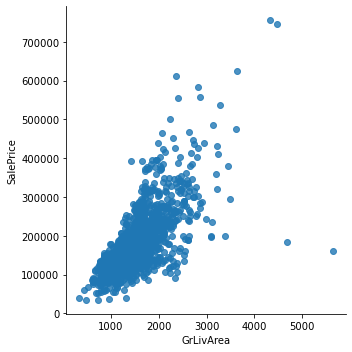

In [54]:
# 회귀같은 경우에서는 y target에 대해서도 outlier를 고민/체크를 해야하고
# Feature에 대해서도 outlier에 대한 고민을 잘 해야한다!!!!
# 분류같은 경우에서 target이 outlier라는 불균형데이터가....있지만
# 그 경우에는 평가방식이나 데이터를 샘플링 방식으로 접근이지
# 데이터를 날리는 것은 좀;;;;
plt.figure()
otl = sns.lmplot(data=train_df, x="GrLivArea", y="SalePrice", fit_reg=False)

- 위에 대한 데이터를 보고, outlier를 처리하기 위한 조건 선택

In [55]:
len(train_df[train_df["GrLivArea"]>4000])

4

In [56]:
# GrLivArea인 특징이 4000초과인 친구들은 제거를 하도록 하겠습니다.
train_df[train_df["GrLivArea"]>4000][["SalePrice","GrLivArea"]]

,SalePrice,GrLivArea
523,184750,4676
691,755000,4316
1182,745000,4476
1298,160000,5642


In [57]:
# 위의 4개의 데이터를 누락을 시키고 train 데이터를 재구성..
train_df.drop(train_df[train_df["GrLivArea"]>4000].index, inplace=True)

<Figure size 432x288 with 0 Axes>

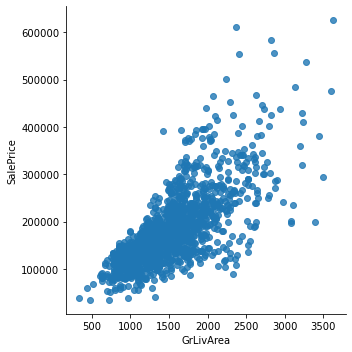

In [58]:
plt.figure()
otl = sns.lmplot(data = train_df, x="GrLivArea", y ="SalePrice", fit_reg = False)

In [59]:
print(train_df.shape)

(1456, 81)


- Target Value에 대한 것을 확인

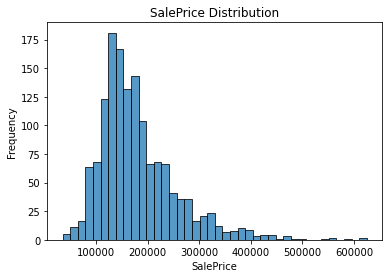

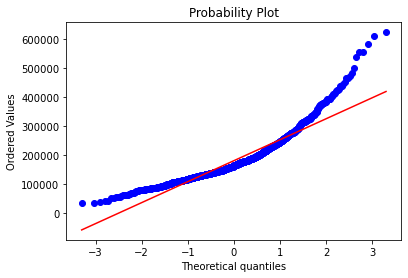

Skewness: 1.566


In [60]:
# 아직 seaborn 에서 stats로 넘기는 부분에서 워닝 부분이 안 되어서 아직은 여기서 워닝에 대한 부분은 타나남.
sns.histplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')
plt.figure()

# stats에 바로 접근하는 부분에 있어서는 array로 명확하게 변환을 해서 넘기면 워닝은 없어짐!!!!
qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
plt.show()
print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))

- 타겟에 대한 로그 변환 취하기 : 양수에 대해서 처리 하고자 하니 +1을 하고 로그를 취해서 0의 값에 대해서 발생할 수 있는 문제에 대한 것 방지!

In [61]:
# log1p : log(1 + input)
# 원래 생각하는 Traget : SalePrice에 대해서 값의 변동 너무 커서 좀 스케일을 줄이고,,,,
# ++++ 한쪽에 쏠린 값을 좀 피려고 합니다... log 변환을 하는데,,, 모두 양수 : +1
#train_df["SalePrice"]
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
train_df["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1456, dtype: float64

- 로그를 취하면 그 결과가 치우친 부분들이 어떻게 되는지 확인

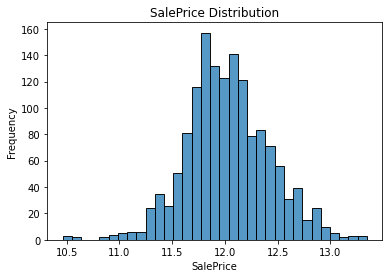

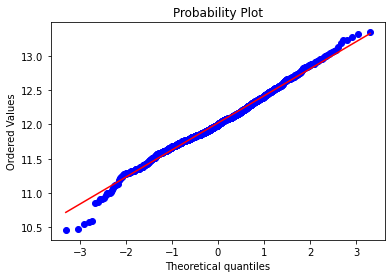

Skewness: 0.065


In [62]:
sns.histplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
plt.show()

print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))

- 보통은 전체 특성들에 대해서 다 상관계수나 pairplot을 그려보겠지만, 지금은 너무 데이터가 많이 있기에 하기가 힘들다. 그래서 상위 몇 개의 상관계수가 높은 것들에 대해서만 보고자 함!!!!  

해석 : 그래서 보면 집가격에 영향을 미치는 상위 10개에 대해서 확인을 한 결과 퀄리티에 관련된 (OverallQual,FullBath, YearBuilt, YearRemodAdd)와 크기에 대한 (GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF) 부분들이 중요한 부분으로 차지하고 있음!!!

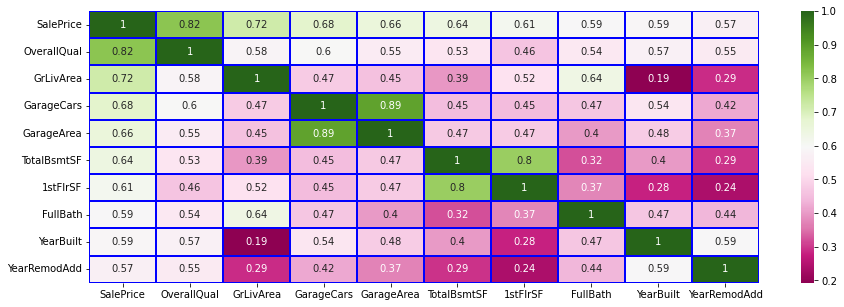

In [63]:
plt.figure(figsize=(15,5))

corr_train = train_df.corr()


num = 10
col = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(train_df[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='PiYG', linecolor='blue')

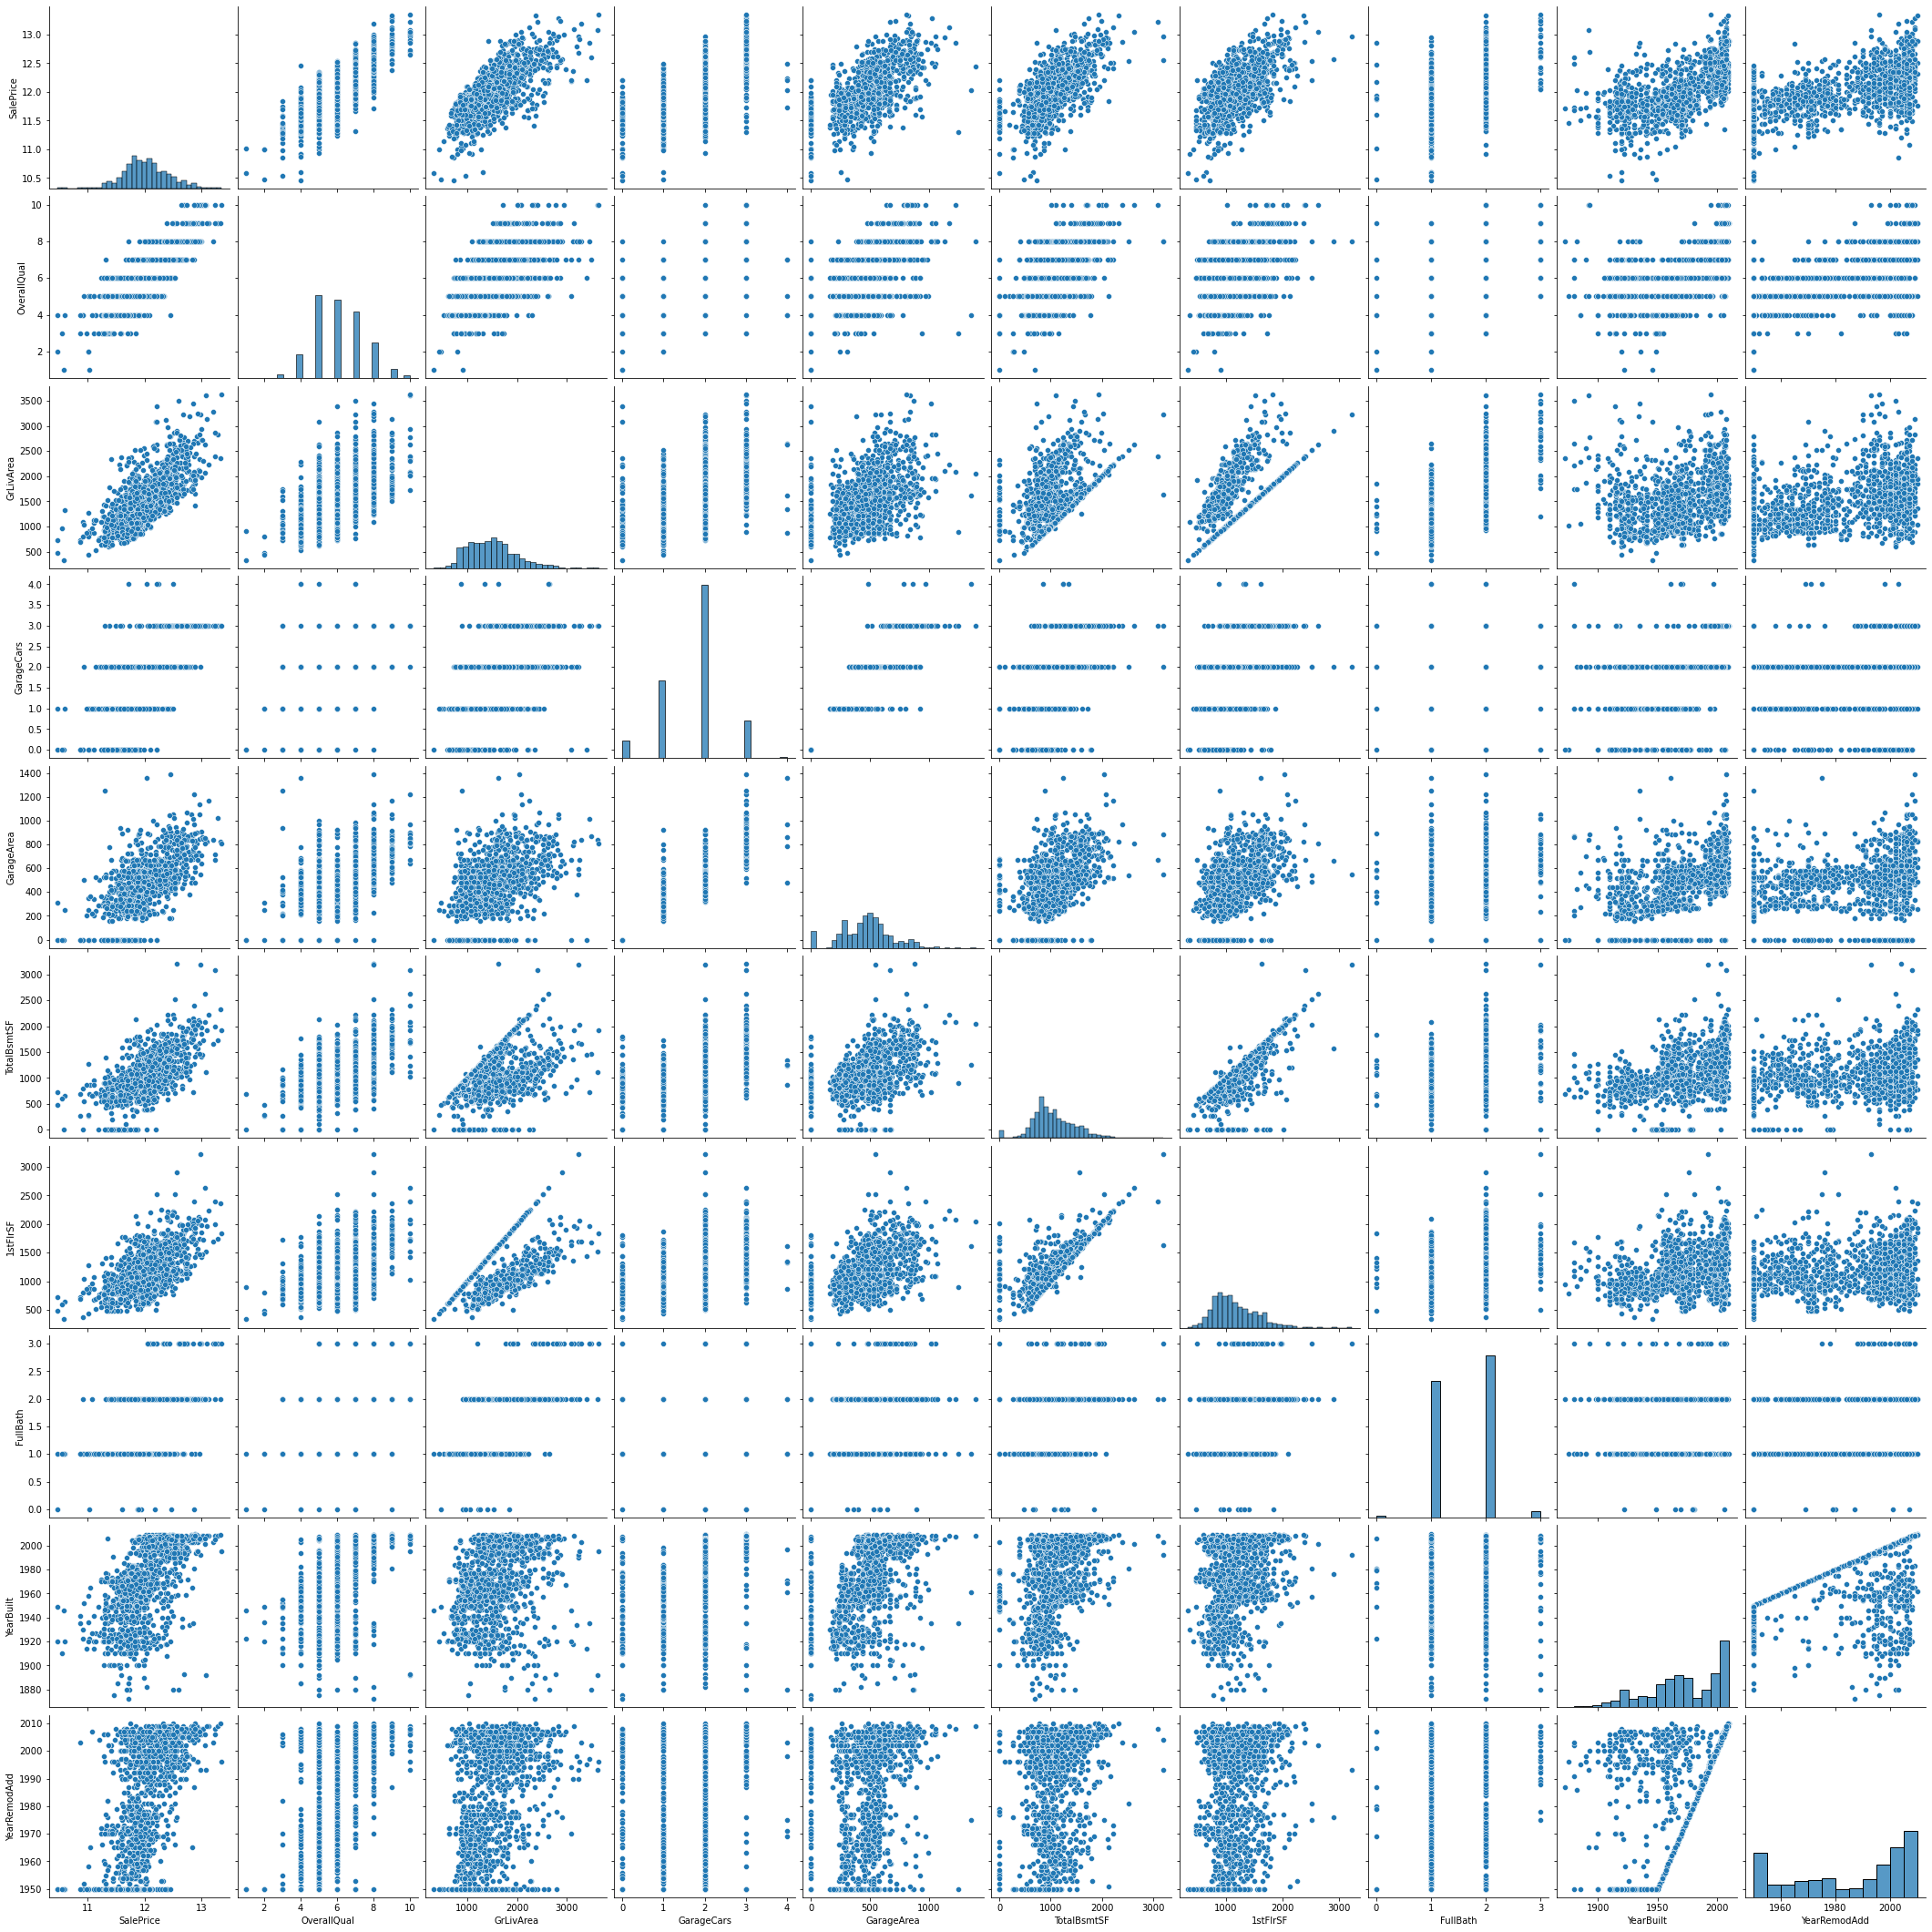

In [64]:
sns.pairplot(train_df[col], height=3)

In [65]:
#### 위와 같은 부분들을 통해서 EDA를 하면서 데이터 이해를 해야함..--> 여기서는 skip

## 변수들 정리: Feature/Target 분리

- 변수 분리 : 특징과 라벨에 대한 분리 작업 수행 ---> id라는 컬럼은 맨 앞에 있어서 0번으로 선택을 해서 지운 것이며, 학습할 특징에서는 제외를 하여야 하기에 drop을 이용해서 지우게 됨!!!

처음에는 81개의 컬럼이 있었는데, 의미없는 id 컬럼 제거 & 타겟에 대한 가격에 대한 것 제거를 해서 총 81개에서 2개를 제외한 79개로 수정이 됨!!!!

In [66]:
train_id = train_df["Id"] # <-- 학습과 전혀 무관한 컬럼..
test_id = test_df["Id"] # <--- 정답지 kaggle 제출 양식에서는 사용을 함. 

# train/test하고 불필요한 컬럼을 제거를 하겠습니다.
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

In [67]:
train_df.shape

(1456, 80)

In [68]:
test_df.shape

(1459, 79)

In [69]:
# 학습을 하기 위해서 train_df의 정답지를 분리....
y_df = train_df["SalePrice"]
train_df.drop("SalePrice", axis=1, inplace=True)

print('dimension of the train:' , train_df.shape)
print('dimension of the test:' , test_df.shape)

dimension of the train: (1456, 79)
dimension of the test: (1459, 79)


## Feature Engineering

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuil

## Missing Data 처리를 위한 확인

In [71]:
# train 데이터에서 빵구난 데이터의 비율 check
train_ms = pd.DataFrame(train_df.isnull().sum(), columns=["MissingCount"])
train_ms = train_ms[train_ms["MissingCount"]!=0]
train_ms["Missing%"] = train_ms["MissingCount"] / len(train_df) * 100
train_ms.sort_values("MissingCount", ascending=False)

,MissingCount,Missing%
PoolQC,1451,99.656593
MiscFeature,1402,96.291209
Alley,1365,93.750000
Fence,1176,80.769231
FireplaceQu,690,47.390110
LotFrontage,259,17.788462
GarageType,81,5.563187
GarageYrBlt,81,5.563187
GarageFinish,81,5.563187
GarageQual,81,5.563187


In [72]:
# test 데이터에서 빵구난 데이터의 비율 check
test_ms = pd.DataFrame(test_df.isnull().sum(), columns=["MissingCount"])
test_ms = test_ms[test_ms["MissingCount"]!=0]
test_ms["Missing%"] = test_ms["MissingCount"] / len(test_df) * 100
test_ms.sort_values("MissingCount", ascending=False)

,MissingCount,Missing%
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127


## 빈 값들에 대해서 채우는 것 : None으로 처리할 것과 0으로 처리할 것으로 구분을 함!!! 아니면 중간값이나 이런 부분으로 채우고 싶으면 Imputer등에 대한 것들을 활용하면 됨!!!

### 여기서는 None으로 채우고 싶음

In [73]:
nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

In [74]:
# 위에서 None 문자열 값으로 채울려고 하는 컬럼들. train 적용..
# 위의 빵구값을 None으로 채울 컬럼을 test에도 동일하게 적용...
for col in nones:
    train_df[col].fillna("None", inplace=True)
    test_df[col].fillna("None", inplace=True)

### 여기서는 0으로 채우고 싶음

In [75]:
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']
# train/test에서 0으로 채울 컬럼들을 리스트업을 하였고,
# 이 기준을 그대로 train/test에 동일하게 적용ㅇ!!!!!
for col in zeros:
    train_df[col].fillna(0, inplace=True)
    test_df[col].fillna(0, inplace=True)

In [76]:
train_df[train_df["GarageYrBlt"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


### Utilities 컬럼은 너무 많이 하나의 데이터로 되어 있어서, 특징으로 사용이 불가능 할 것임!! 그래서 제거하기로 함!

In [77]:
train_df["Utilities"].value_counts()

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

In [78]:
test_df["Utilities"].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [79]:
# Utilities : 누락은 아니지만 값의 종류에 문제가 있음;;;
# 특징으로 역할을 하지 못할 부분이 있어서...
train_df.drop("Utilities", axis= 1, inplace=True)
test_df.drop("Utilities", axis= 1, inplace=True)

### 아래의 컬럼들은 위의 Utilites와는 달리 너무까지는 아니지만, 빠진 것들도 존재를 하고, 많은 항목들도 있고, 치우친 것들이 있어서, 제일 많이 나타나는 항목으로 채우고자 함!!!!

In [80]:
train_df["MSZoning"].value_counts()

RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [81]:
test_df["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [82]:
# 나는 이번에는 카테고리형의 변수에서 빠진값을 위에와 달리
# None이라는 문자열 임의값 보다는 분포를 생각해서 최빈값으로 채우겠다고 하면!!!!!

In [83]:
freq = ['MSZoning','Exterior1st',
        'Exterior2nd','SaleType','Electrical',
        'KitchenQual','Functional']

# 여기서 주의해야 합니다!!!!
for fr in freq:
    train_df[fr].fillna(train_df[fr].mode()[0], inplace=True)
    test_df[fr].fillna(train_df[fr].mode()[0], inplace=True)

### LotFrontage 에서는 너무 많은 값들이 이상하고, 이 값들으 좀 처리하기 위해서 비슷한 것들을 묶어서 사용을 하려고 함.  

#### 그래서 우선은 기존의 값은 old_lotfrontage라는 컬럼으로 두고, LotArea, Neighborhood로 그룹화 해서 거기서 나오는 값을 바탕으로 처리하고자 함!!!

In [84]:
# LotFrontage : 부동산과 연결된 도로의 선형 피트
# Neighborhood : 에임스 시 경계 내의 물리적인 위치

# --> 대략적으로 한 200개 정도 누락된 LotFrontage 수치형 컬럼을 채우기 위해서
# 정보가 없어서 0입니다라고 채울 수 있지만, 유사하게 현실을 반영해서 채울 수 있는 방법이 있다고 하고
# 물리적인 위치와 거의 유사할꺼라 생각해서 유사한 데이터를 그룹핑을 해서 대표값으로 채울려고 하는 방식.

In [85]:
# 기존의 LotFrontage 값을 잠시 보관..

In [86]:
train_df["old_LotFrontage"] = train_df["LotFrontage"]
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,old_LotFrontage
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,65.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,80.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,68.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,60.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,84.0


In [87]:
# train 데이터를 기준으로 neighhborhood로 묶은 후 대표값을 중앙값으로 하여
# 혹시 누락된 LotFrontage 값이 있다면 Neighborhood 참조해서 채우겠다!!!!!!
ref_table = train_df.groupby(by="Neighborhood")["LotFrontage"].agg(np.median)
ref_table

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    64.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    90.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [88]:
# train 데이터에 적용
train_df["LotFrontage"] = train_df.groupby(by="Neighborhood")["LotFrontage"].transform(lambda x :x.fillna(x.median()) )

In [89]:
# test 데이터에 적용을 하기 위해서는 join
test_df["old_LotFrontage"] = test_df["LotFrontage"]
test_df = pd.merge(test_df, ref_table, how = "left", 
                   left_on = "Neighborhood",
                   right_on = "Neighborhood")
test_df

,MSSubClass,MSZoning,LotFrontage_x,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,old_LotFrontage,LotFrontage_y
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,None,0,6,2010,WD,Normal,80.0,73.0
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,Gar2,12500,6,2010,WD,Normal,81.0,73.0
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,None,MnPrv,None,0,3,2010,WD,Normal,74.0,65.0
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,None,0,6,2010,WD,Normal,78.0,65.0
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,None,None,None,0,1,2010,WD,Normal,43.0,61.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,6,2006,WD,Normal,21.0,21.0
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,4,2006,WD,Abnorml,21.0,21.0
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,9,2006,WD,Abnorml,160.0,73.0
1457,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,Shed,700,7,2006,WD,Normal,62.0,73.0


In [90]:
test_df.loc[test_df["LotFrontage_x"].isnull(), ["Neighborhood", "LotFrontage_x", "LotFrontage_y", "old_LotFrontage"]]

,Neighborhood,LotFrontage_x,LotFrontage_y,old_LotFrontage
6,Gilbert,NaN,65.0,NaN
40,Somerst,NaN,73.5,NaN
41,Somerst,NaN,73.5,NaN
45,NWAmes,NaN,80.0,NaN
47,NWAmes,NaN,80.0,NaN
...,...,...,...,...
1387,CollgCr,NaN,70.0,NaN
1390,CollgCr,NaN,70.0,NaN
1440,Timber,NaN,85.0,NaN
1441,Timber,NaN,85.0,NaN


In [91]:
# test에서 누락된 값을 train에서 추출한 대표값으로 변경
test_df.loc[test_df["LotFrontage_x"].isnull(),"LotFrontage_x"] = test_df.loc[test_df["LotFrontage_x"].isnull(),"LotFrontage_y"]
# train에서 참조한 대표값 컬럼 제거
test_df.drop("LotFrontage_y", axis = 1, inplace=True)
# LotFrontage_x 컬럼 이름 변경...
test_df.rename(columns={"LotFrontage_x":"LotFrontage"}, inplace=True)

In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1459 non-null   int64  
 1   MSZoning         1459 non-null   object 
 2   LotFrontage      1459 non-null   float64
 3   LotArea          1459 non-null   int64  
 4   Street           1459 non-null   object 
 5   Alley            1459 non-null   object 
 6   LotShape         1459 non-null   object 
 7   LandContour      1459 non-null   object 
 8   LotConfig        1459 non-null   object 
 9   LandSlope        1459 non-null   object 
 10  Neighborhood     1459 non-null   object 
 11  Condition1       1459 non-null   object 
 12  Condition2       1459 non-null   object 
 13  BldgType         1459 non-null   object 
 14  HouseStyle       1459 non-null   object 
 15  OverallQual      1459 non-null   int64  
 16  OverallCond      1459 non-null   int64  
 17  YearBuilt     

- 왼쪽이 처리하기 전의 기존의 값의 분포이고, 오른쪽이 위와 같은 처리를 하였을 때의 분포를 나타낸 것임!!

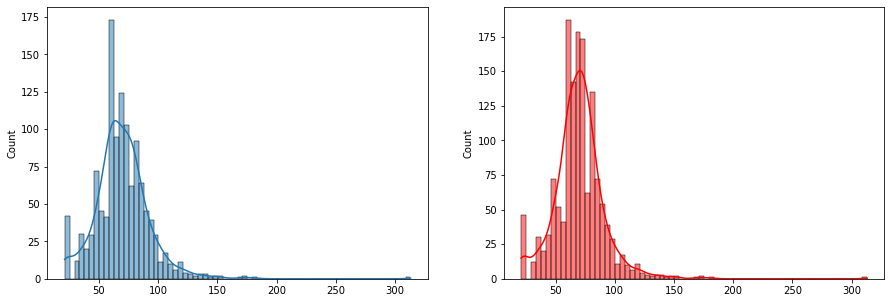

In [93]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.histplot(np.array(train_df['old_LotFrontage'].dropna()),ax=ax1,kde=True,bins=70)
lf = sns.histplot(np.array(train_df['LotFrontage']),ax=ax2,kde=True,bins=70,color='red')

train_df.drop('old_LotFrontage',axis=1,inplace=True)

- 위와 같이 처리를 해서 이상한 값에 대한 것들을 처리를 완료함

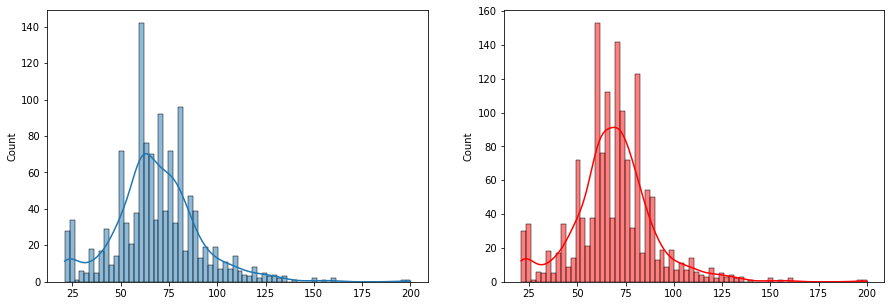

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.histplot(np.array(test_df['old_LotFrontage'].dropna()),ax=ax1,kde=True,bins=70)
lf = sns.histplot(np.array(test_df['LotFrontage']),ax=ax2,kde=True,bins=70,color='red')

test_df.drop('old_LotFrontage',axis=1,inplace=True)

In [95]:
### train/ test에서 이제는 nan으로 문제가 되는 것들이 없는지 확인!!!

In [96]:
train_df.isnull().sum().sum()

0

In [97]:
test_df.isnull().sum().sum()

0

In [98]:
train_df.shape

(1456, 78)

In [99]:
test_df.shape

(1459, 78)

# 변형 및 인코딩

## 범주형 데이터 변형

In [100]:
# 뒤에서 그냥  get_dummy로 처리할 것임...
nominals = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MoSold','YrSold']
# --> 카테고리 변수인데,,, 전통적인 회귀방법에서 사용하는 dummy변수화~~

### 여기서는 순서가 중요한 변수들

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']


In [123]:
# 주의할 점은 train에서 규칙을 정하고,, test에 그래도 적용!!!!
# But 문제는 test에서는 전혀 보지 못한 unseen 데이터가 발생할 수 있으니 처리!!!
# model.fit() ---> model.predict(X_test) : 에러가!!!
for ord in ordinals:
    # ord 컬럼에 적용할 인코딩 모델
    le = LabelEncoder()
    # 규칙을 학습 : train에서 학습
    le.fit(train_df[ord]) # <- 간략히 컬럼 선택.. loc/iloc
    # 학습한 규칙을 적용...
    train_df[ord] = le.transform(train_df[ord])

    # test에도 동일한 규칙으로 변환을 적용을 할 것인데,,혻 unseen 데이터가 나오면~~
    # 기존 train에 대한 변환 규칙
    prev_class = list(le.classes_)
    # test에서 unqiue 값을 보고 <<  prev_class, unqie > prev_class
    for label in np.unique(test_df[ord]):
        if label not in prev_class:
            prev_class.append(label)
    le.classes_ = np.array(prev_class)
    # ---> 혹 test에서 unseen 값을 보면, 변환할 수 있는 룰을 업데이트를 함..
    test_df[ord] = le.transform(test_df[ord])


## House Price에 상관계수가 높은 거의 비슷한 컬럼들을 종합하여서 1개의 컬럼으로 변형

In [124]:
# 새로운 지표를 만들거나, 기존지표를 통합...
# 기존을 컬럼을 줄여나가는 것 --> 모델을 좀더 심플하게 underfit -->
# new한 데이터에 대해서 일반성을 확보하기 위해서.....
train_df["totalArea"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
test_df["totalArea"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]
# ---> 도메일 지식 & 상관계수나 이런 부분들을 참조해서 FE

In [125]:
train_df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'MoSold_8', 'MoSold_9', 'MoSold_10', 'MoSold_11', 'MoSold_12',
       'YrSold_2006', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009',
       'YrSold_2010'],
      dtype='object', length=249)

## 수치 데이터의 분포를 보고, 얼마나 치우쳐서 있는지 확인 : +1보다 크고, -1보다 작으면 상당히 skew되어 있으며, -1-0.5/ 0.51 사이에는 적당히 skew, -0.5~ 0.5 사이는 적당히 잘 분포

In [126]:
#### --> type 확인에 대한 방법
numeric = train_df.dtypes[train_df.dtypes != "object"].index
skewness = train_df[numeric].apply(lambda x : x.skew()).sort_values(ascending=False)
sk_train_df = pd.DataFrame(skewness, columns = ["skewness"])
sk_train_df["skw"] = abs(sk_train_df["skewness"])
sk_train_df.sort_values(by="skw", ascending=False).drop("skewness", axis=1, inplace=True)
sk_train_df.head()

,skewness,skw
Exterior2nd_Other,38.157568,38.157568
Condition2_PosA,38.157568,38.157568
RoofMatl_Metal,38.157568,38.157568
Condition2_RRAe,38.157568,38.157568
Heating_Floor,38.157568,38.157568


In [127]:
numeric = test_df.dtypes[test_df.dtypes != "object"].index
skewness = test_df[numeric].apply(lambda x : x.skew()).sort_values(ascending=False)
sk_test_df = pd.DataFrame(skewness, columns = ["skewness"])
sk_test_df["skw"] = abs(sk_test_df["skewness"])
sk_test_df.sort_values(by="skw", ascending=False).drop("skewness", axis=1, inplace=True)
sk_test_df.head()

,skewness,skw
Exterior2nd_Stone,38.196859,38.196859
Exterior1st_CBlock,38.196859,38.196859
Exterior2nd_AsphShn,38.196859,38.196859
Exterior1st_AsphShn,38.196859,38.196859
RoofMatl_WdShngl,38.196859,38.196859


In [105]:
sk_df = pd.concat([sk_train_df, sk_test_df])
sk_df

,skewness,skw
MiscVal,24.443364,24.443364
PoolArea,17.522613,17.522613
LotArea,12.587561,12.587561
3SsnPorch,10.289866,10.289866
LowQualFinSF,8.998564,8.998564
...,...,...
YrSold,0.168986,0.168986
GarageCars,-0.109993,0.109993
YearRemodAdd,-0.399906,0.399906
YearBuilt,-0.587657,0.587657


In [106]:
# 기준을 0.5이상 값을 가진 컬럼들을 기준으로 선별하자..
skw_features = np.unique(sk_df[sk_df.skw > 0.5].index)
skw_features

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallCond', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'totalArea'],
      dtype=object)

In [107]:
# 위에 찾은 컬럼들은 한쪽으로 쏠림에 대한 경우가 크니 log 변환을 하겠다..
# 이 경우에서는 sclaer 사용을 해서 할 수 있는데,,
# 이렇게 한쪽으로 치우친 데이터들은 standsclaer계열을 사용을 하면....
# 여기서는 단순히 log변환을 하겠음.
train_df[skw_features] = np.log1p(train_df[skw_features])
test_df[skw_features] = np.log1p(test_df[skw_features])

In [108]:
print(train_df.shape)
print(test_df.shape)

(1456, 79)
(1459, 79)


### 위의 결과들이 엄청나게 skew되어 있어서 이에 대한 변형 수행 : log1p사용 : log(x+1)

### 기타 아직 변형이 안 되어 있는 아주 중요하지 않은 변수들(카테고리)을 처리

In [110]:
train_df = pd.get_dummies(train_df, columns = nominals, prefix_sep="_")
test_df = pd.get_dummies(test_df, columns = nominals, prefix_sep="_")
print(train_df.shape)
print(test_df.shape)

(1456, 249)
(1459, 237)


In [111]:
# 각기 컬럼들이 다르게 확장이 되었는데, 이것을 정리를 해야하는데,,
# 정리의 기준은? train을 기준으로 정리를 하셔야 함.
# case1) train에서만 생성이 되고, test에는 생성이 안 되는 컬럼!!!!
#        --> test에서 train있는 컬럼을 추가....
# case2) train에서는 생성이 안 된 컬럼인데, test에서만 생성된 unseen컬럼
#       --> test에서 컬럼을 제거....

In [112]:
# 처리할 컬럼들을 리스트업
cat_dummies = [ col for col in train_df if "_" in col and col.split("_")[0] in nominals] 
# case1) train에만 있고, test에 없는 경우 --> test에 추가, 0으로 채우면..
for col in cat_dummies:
    if col not in test_df.columns:
        print("Adding Columns:", col)
        test_df[col] = 0
# case2) test에서 unseen --> train에서 사용안하는 것이닌 test에서 제거!!!!
for col in test_df.columns:
    if ("_" in col) and (col.split("_")[0] in nominals) and col not in cat_dummies:
        print("Remove Columns", col)
        test_df.drop(col, axis = 1, inplace =True)


Adding Columns: Condition2_RRAe
Adding Columns: Condition2_RRAn
Adding Columns: Condition2_RRNn
Adding Columns: HouseStyle_2.5Fin
Adding Columns: RoofMatl_Membran
Adding Columns: RoofMatl_Metal
Adding Columns: RoofMatl_Roll
Adding Columns: Exterior1st_ImStucc
Adding Columns: Exterior1st_Stone
Adding Columns: Exterior2nd_Other
Adding Columns: Heating_Floor
Adding Columns: Heating_OthW
Adding Columns: MiscFeature_TenC
Remove Columns MSSubClass_5.017279836814924


In [113]:
train_df.shape

(1456, 249)

In [114]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 249 entries, LotFrontage to YrSold_2010
dtypes: float64(28), int64(6), object(20), uint8(195)
memory usage: 935.2+ KB


In [115]:
test_df.shape

(1459, 249)

In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 249 entries, LotFrontage to MiscFeature_TenC
dtypes: float64(30), int64(17), object(20), uint8(182)
memory usage: 1.0+ MB


In [117]:
# Scaler 작업을 수행을 하겠습니다. ++ opt

In [118]:
from sklearn.preprocessing import StandardScaler

In [128]:
# 정규화 작업
scaler = StandardScaler()
# 규칙 : train
scaler.fit(train_df)

StandardScaler()

In [129]:
# 위의 기준을 train, test에 모두 적용..
X_train = scaler.transform(train_df)
X_train = pd.DataFrame(X_train, columns =train_df.columns)

# test set도 train과 동일한 컬럼 순서를 가지게 됨...
X_test = scaler.transform(test_df)
X_test = pd.DataFrame(X_test, columns =train_df.columns)


C:\Users\NTX550\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [130]:
X_train.shape

(1456, 249)

In [131]:
X_test.shape

(1459, 249)

In [132]:
X_train.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-0.076848,-0.127817,0.748359,-0.226042,0.665646,-0.517461,1.047925,0.880629,1.209296,-0.796209,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,-0.524363,-0.537118,1.950713,-0.549841,-0.369611
1,0.562906,0.120797,0.748359,-0.226042,-0.064709,2.176545,0.166164,-0.427190,-0.805439,0.663841,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,-0.524363,1.861789,-0.512633,-0.549841,-0.369611
2,0.062014,0.429834,-1.382561,-0.226042,0.665646,-0.517461,0.983018,0.832191,1.137048,-0.796209,...,-0.302414,4.702245,-0.253629,-0.239523,-0.205508,-0.524363,-0.537118,1.950713,-0.549841,-0.369611
3,-0.322950,0.110623,-1.382561,-0.226042,0.665646,-0.517461,-1.871129,-0.717817,-0.805439,0.663841,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,1.907077,-0.537118,-0.512633,-0.549841,-0.369611
4,0.713484,0.891805,-1.382561,-0.226042,1.396000,-0.517461,0.950540,0.735316,1.429555,-0.796209,...,-0.302414,-0.212664,-0.253629,-0.239523,4.866001,-0.524363,-0.537118,1.950713,-0.549841,-0.369611


In [133]:
X_test.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.562906,0.493221,0.748359,-0.226042,-0.795063,0.380541,-0.328921,-1.153757,-0.805439,0.663841,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,-0.524363,-0.537118,-0.512633,-0.549841,-0.369611
1,0.601236,0.892761,-1.382561,-0.226042,-0.064709,0.380541,-0.428392,-1.299070,0.983593,0.663841,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,-0.524363,-0.537118,-0.512633,-0.549841,-0.369611
2,0.322489,0.832144,-1.382561,-0.226042,-0.795063,-0.517461,0.853009,0.638440,-0.805439,0.663841,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,-0.524363,-0.537118,-0.512633,-0.549841,-0.369611
3,0.484805,0.196046,-1.382561,-0.226042,-0.064709,0.380541,0.885535,0.638440,0.355581,0.663841,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,-0.524363,-0.537118,-0.512633,-0.549841,-0.369611
4,-1.343474,-1.148225,-1.382561,-0.226042,1.396000,-0.517461,0.690131,0.347814,-0.805439,-0.796209,...,-0.302414,-0.212664,-0.253629,-0.239523,-0.205508,-0.524363,-0.537118,-0.512633,-0.549841,-0.369611


# Train / Test 분리

In [134]:
# 참고로 원래의 데이터가 train / test 가 1456개, 1459개로 거의 동일한 크기의 데이터가 주어진 것!!!
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(1456, 249), test shape:(1459, 249)
